### Carregando pacotes e definindo configurações

In [57]:
# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# Pandas profilling
from pandas_profiling import ProfileReport
## Graphs
import seaborn as sns
## easier graphs
from plotnine import *
## train test split
from sklearn.model_selection import train_test_split
## grid search
from sklearn.model_selection import GridSearchCV
## cros validation
from sklearn.model_selection import cross_val_score
## Logistic regression
from sklearn.linear_model import LogisticRegression
## Knn
from sklearn.neighbors import KNeighborsClassifier
## scaler
from sklearn.preprocessing import MinMaxScaler
## Random Forest
#from sklearn import 
## Decision tree
from sklearn import tree
## Metrics of the model
from sklearn import metrics
## random forest
from sklearn.ensemble import RandomForestClassifier

In [58]:
## Definig some configurations
pd.set_option('display.max_columns', None) ## Show All columns
%matplotlib inline
#pd.set_option('display.float_format', lambda x: '%.3f' % x) ## Defining the number of floats to show

### Read the Data

In [59]:
titanic = pd.read_csv("data/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data understanding

In [60]:
## criando o profilling
profile = ProfileReport(titanic, title="Perfil do banco Titanic",vars={"num": {"low_categorical_threshold": 0}})

In [61]:
## mostrando o profilling
#profile.to_widgets()
##profile.to_file("perfilTitnic.html")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

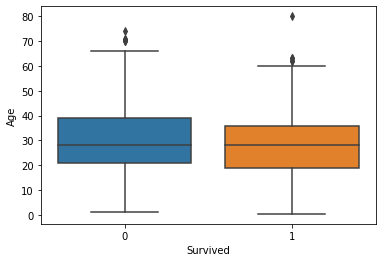

In [62]:
sns.boxplot(data = titanic, x ='Survived', y = 'Age' )


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

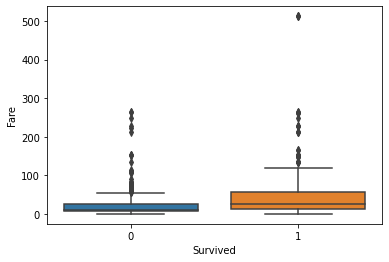

In [63]:
sns.boxplot(data = titanic, x ='Survived', y = 'Fare' )

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

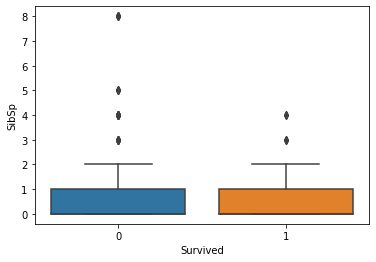

In [64]:
sns.boxplot(data = titanic, x ='Survived', y = 'SibSp' )

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

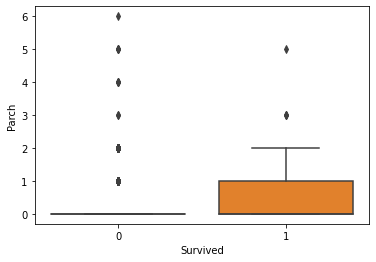

In [65]:
sns.boxplot(data = titanic, x ='Survived', y = 'Parch' )

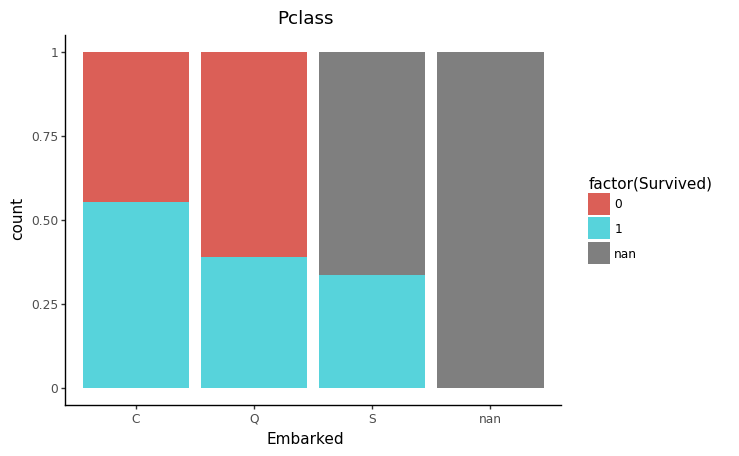

<ggplot: (163354065911)>

In [66]:
(ggplot(titanic, aes(fill = 'factor(Survived)', x = "Embarked"))
+ geom_bar(position='fill')
##+ scale_fill_manual(values=cores)
+ theme_classic()
+ labs( title = "Pclass")
)


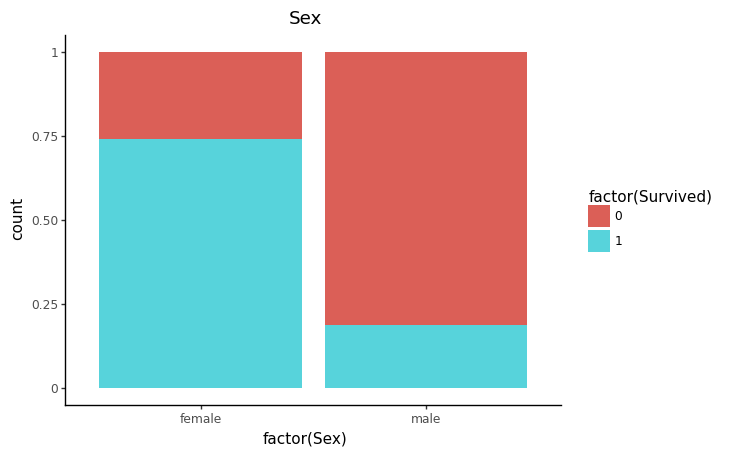

<ggplot: (163354104055)>

In [67]:
(ggplot(titanic, aes(fill = 'factor(Survived)', x = "factor(Sex)"))
+ geom_bar(position='fill')
#+scale_fill_manual(values=cores)
+ theme_classic()
+ labs( title = "Sex")
)

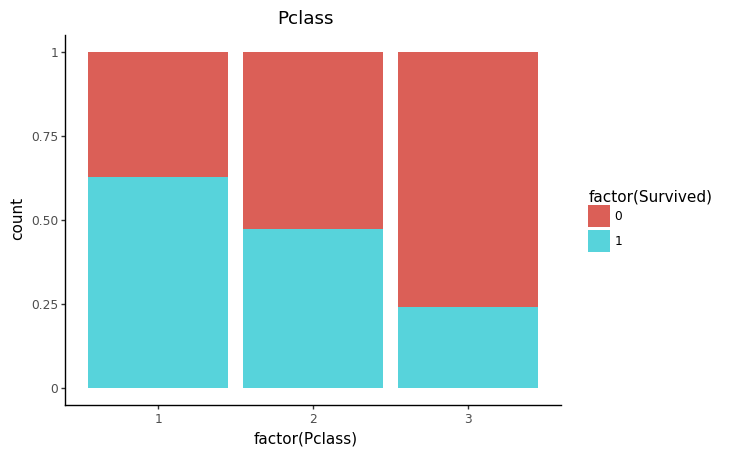

<ggplot: (163354138076)>

In [68]:
(ggplot(titanic, aes(fill = 'factor(Survived)', x = "factor(Pclass)"))
+ geom_bar(position='fill')
#+scale_fill_manual(values=cores)
+ theme_classic()
+ labs( title = "Pclass")
)

C:\Users\DPCDTI\AppData\Roaming\Python\Python38\site-packages\plotnine\layer.py:334: PlotnineWarning: stat_boxplot : Removed 177 rows containing non-finite values.


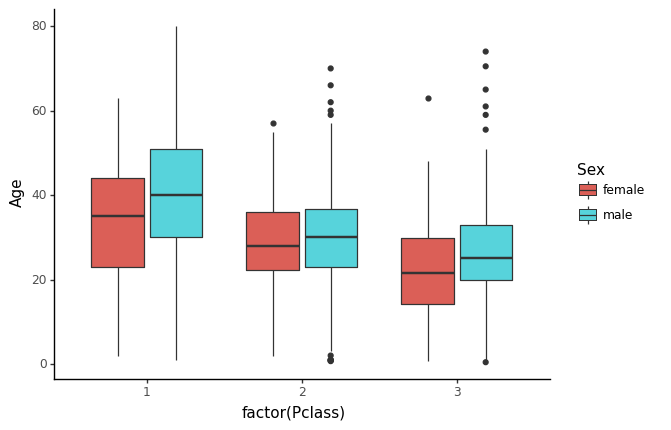

<ggplot: (163354174202)>

In [69]:
(
ggplot(titanic, aes(x = 'factor(Pclass)', y = 'Age' , fill ='Sex'  ))
+ geom_boxplot()
+ theme_classic()
)

In [70]:
idades = titanic[['Pclass','Age','Sex']].groupby(by = ['Pclass','Sex']).agg(n=pd.NamedAgg(column='Age', aggfunc='count'),
mediana=pd.NamedAgg(column='Age', aggfunc='median'))
idades

n  mediana
Pclass Sex                 
1      female   85     35.0
       male    101     40.0
2      female   74     28.0
       male     99     30.0
3      female  102     21.5
       male    253     25.0

In [71]:
idades2 = titanic[['Pclass','Age','Sex']].groupby(by = ['Pclass','Sex']).median()
idades2 = pd.Series(idades2['Age'])
idades2 


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

### Data preparation

In [72]:
## input age
idades2 = titanic[['Pclass','Age','Sex']].groupby(by = ['Pclass','Sex']).median()
idades2 = pd.Series(idades2['Age'])
#titanic['ageteste'] = titanic['Age']
titanic.set_index(['Pclass','Sex'], inplace=True)
titanic['Age'] = titanic['Age'].fillna(idades2)
titanic.reset_index(inplace=True)
titanic

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",21.5,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


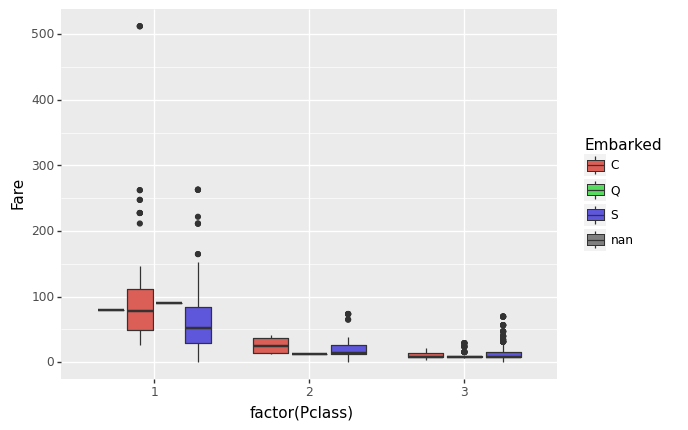

<ggplot: (163354321448)>

In [73]:
## Entendendo o local do embarque para poder imputar

(
ggplot(titanic, aes(x = 'factor(Pclass)', y = 'Fare' , fill ='Embarked'  ))
+ geom_boxplot()

)

In [74]:
idades = titanic[['Pclass','Fare','Embarked']].groupby(by = ['Pclass','Embarked']).agg(
    n=pd.NamedAgg(column='Fare', aggfunc='count'),
    mediana=pd.NamedAgg(column='Fare', aggfunc='median'),
    media=pd.NamedAgg(column='Fare', aggfunc='mean'),
    min=pd.NamedAgg(column='Fare', aggfunc='min'),
    max=pd.NamedAgg(column='Fare', aggfunc='max')
    )
idades

n  mediana       media      min       max
Pclass Embarked                                             
1      C          85  78.2667  104.718529  26.5500  512.3292
       Q           2  90.0000   90.000000  90.0000   90.0000
       S         127  52.0000   70.364862   0.0000  263.0000
2      C          17  24.0000   25.358335  12.0000   41.5792
       Q           3  12.3500   12.350000  12.3500   12.3500
       S         164  13.5000   20.327439   0.0000   73.5000
3      C          66   7.8958   11.214083   4.0125   22.3583
       Q          72   7.7500   11.183393   6.7500   29.1250
       S         353   8.0500   14.644083   0.0000   69.5500

In [75]:
## As duas pessoas qque falta a infomração de ondem embarcaram, viajaram naprimeira clase e pagaram 80. 
## de acordo com a análise feita,decidimos por inputar 'C'

titanic['Embarked'] = titanic['Embarked'].fillna('C')
titanic.head()


,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [76]:
### Excluindo colunas desnecessárias
titanic.drop(['PassengerId','Name','Cabin', 'Ticket'], axis= 1, inplace= True)
titanic.head()
## Obtendo a meidana pra inputar no banco de teste
mediana_input = titanic['Fare'].median()
mediana_input


14.4542

In [77]:
titanic = pd.get_dummies(data= titanic, columns= ['Pclass','Sex','Embarked'], drop_first= True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [78]:
scaler = MinMaxScaler()
col = ['Age','Fare','SibSp','Parch']
titanic[col] = scaler.fit_transform(titanic[col])
titanic

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,0.271174,0.125,0.000000,0.014151,0,1,1,0,1
1,1,0.472229,0.125,0.000000,0.139136,0,0,0,0,0
2,1,0.321438,0.000,0.000000,0.015469,0,1,0,0,1
3,1,0.434531,0.125,0.000000,0.103644,0,0,0,0,1
4,0,0.434531,0.000,0.000000,0.015713,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.000,0.000000,0.025374,1,0,1,0,1
887,1,0.233476,0.000,0.000000,0.058556,0,0,0,0,1
888,0,0.264891,0.125,0.333333,0.045771,0,1,0,0,1
889,1,0.321438,0.000,0.000000,0.058556,0,0,1,0,0


In [79]:
# Separando em treino e teste
y = titanic['Survived']
x = titanic.drop(['Survived'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

### Modeling

## KNN

In [80]:
# Escolhendo o k
k_vals = range ( 1, 30)
scores = []
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)


c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
c:\Us

[0.7649253731343284, 0.7873134328358209, 0.7947761194029851, 0.7910447761194029, 0.7910447761194029, 0.7761194029850746, 0.7723880597014925, 0.7686567164179104, 0.7611940298507462, 0.7649253731343284, 0.7686567164179104, 0.7723880597014925, 0.7723880597014925, 0.7723880597014925, 0.7686567164179104, 0.7686567164179104, 0.7761194029850746, 0.7686567164179104, 0.7723880597014925, 0.7686567164179104, 0.7723880597014925, 0.7723880597014925, 0.7686567164179104, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746]


c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


In [81]:
df_knn = pd.DataFrame({'k' :list(k_vals) , 'acuracy': scores }).sort_values('acuracy', ascending=False)

In [82]:
df_knn

,k,acuracy
2,3,0.794776
3,4,0.791045
4,5,0.791045
1,2,0.787313
28,29,0.776119
25,26,0.776119
16,17,0.776119
23,24,0.776119
24,25,0.776119
26,27,0.776119


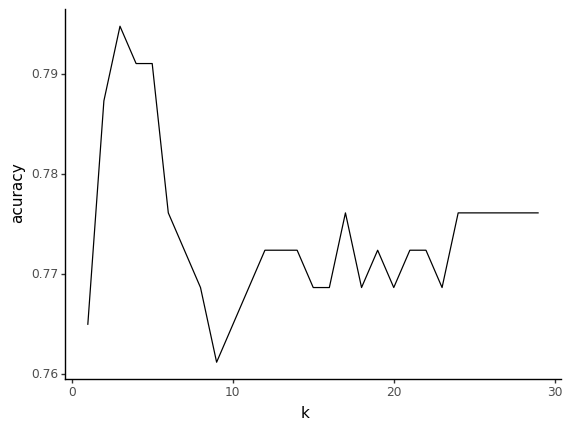

<ggplot: (163354578682)>

In [83]:
(   ggplot( df_knn, aes( x = 'k' , y = 'acuracy'))
    + geom_line()
    + theme_classic()
)

In [84]:
# Ajustando o modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

c:\Users\DPCDTI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


In [85]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       160
           1       0.83      0.62      0.71       108

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [86]:
print(metrics.confusion_matrix(y_test, y_pred))

[[146  14]
 [ 41  67]]


## Random Forest

In [87]:
tree=RandomForestClassifier()
tree.fit(x_train, y_train)

RandomForestClassifier()

In [88]:
y_pred_f = tree.predict(x_test)

In [89]:
print(metrics.classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       160
           1       0.81      0.67      0.73       108

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [90]:
feature_imp = pd.Series(tree.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Sex_male      0.279208
Fare          0.252810
Age           0.250048
Pclass_3      0.072582
SibSp         0.047264
Parch         0.041600
Embarked_S    0.027953
Pclass_2      0.014335
Embarked_Q    0.014199
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


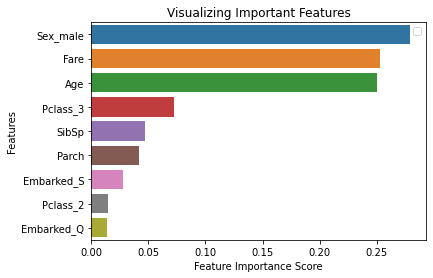

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [92]:
param_grid = {
    'n_estimators': np.linspace(2, 50, 10, dtype = int),
    'max_depth': [4,5,6,7,8,9,10],
    #'min_samples_split': [2, 3, 4],
    #'min_samples_leaf': [2, 3, 4, 5]
}

In [93]:
# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 3)
grid_rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': array([ 2,  7, 12, 18, 23, 28, 34, 39, 44, 50])},
             verbose=3)

In [94]:
grid_rf_search.best_params_

{'max_depth': 4, 'n_estimators': 28}

In [95]:
y_prd_gr_f = grid_rf_search.predict(x_test)

In [96]:

print(metrics.classification_report(y_test, y_prd_gr_f))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       160
           1       0.89      0.55      0.68       108

    accuracy                           0.79       268
   macro avg       0.83      0.75      0.76       268
weighted avg       0.81      0.79      0.78       268



## Regressão logística

In [97]:
logisticreg = LogisticRegression()
logisticreg.fit(x_train,y_train)

LogisticRegression()

In [98]:
y_pred_rl = logisticreg.predict(x_test)

In [99]:
print(metrics.classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       160
           1       0.82      0.67      0.73       108

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



## Comparando resultados

In [100]:
## regressão logistica = y_pred_rl
## random forest       = y_pred_f
## knn                 = y_pred



acuracia = \
[metrics.accuracy_score(y_test, y_pred),\
metrics.accuracy_score(y_test, y_pred_f),\
metrics.accuracy_score(y_test, y_pred_rl)]

recall = \
[metrics.recall_score(y_test, y_pred),\
metrics.recall_score(y_test, y_pred_f),\
metrics.recall_score(y_test, y_pred_rl)]

f1 = \
[metrics.f1_score(y_test, y_pred),\
metrics.f1_score(y_test, y_pred_f),\
metrics.f1_score(y_test, y_pred_rl)]


AUC = \
[metrics.roc_auc_score(y_test, y_pred),\
metrics.roc_auc_score(y_test, y_pred_f),\
metrics.roc_auc_score(y_test, y_pred_rl)]




In [101]:
modelos = ['knn','RandomForest','RegressaoLogistica']
linhas = ['acuracia','recall','f1','AUC']
metricas = [acuracia,recall,f1,AUC]
comparacao = pd.DataFrame(metricas,columns = modelos , index = linhas).T
comparacao

,acuracia,recall,f1,AUC
knn,0.794776,0.620370,0.708995,0.766435
RandomForest,0.802239,0.666667,0.730964,0.780208
RegressaoLogistica,0.805970,0.666667,0.734694,0.783333


In [102]:
comparacao.style.highlight_max(color = 'green', axis = 0)

,acuracia,recall,f1,AUC
knn,0.794776,0.620370,0.708995,0.766435
RandomForest,0.802239,0.666667,0.730964,0.780208
RegressaoLogistica,0.805970,0.666667,0.734694,0.783333


## Fazendo as predições para submeter

### Tratando os dados

In [103]:
titanic_teste = pd.read_csv("data/test.csv")
titanic_teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [104]:
#idades2 = titanic[['Pclass','Age','Sex']].groupby(by = ['Pclass','Sex']).median()
## Idades 2 ja foi definido anteriormente durante o tratamento do banco de treino
#idades2 = pd.Series(idades2['Age'])
#titanic['ageteste'] = titanic['Age']
titanic_teste.set_index(['Pclass','Sex'], inplace=True)
titanic_teste['Age'] = titanic_teste['Age'].fillna(idades2)
titanic_teste.reset_index(inplace=True)
titanic_teste

,Pclass,Sex,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q
1,3,female,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S
2,2,male,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q
3,3,male,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S
4,3,female,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,1305,"Spector, Mr. Woolf",25.0,0,0,A.5. 3236,8.0500,NaN,S
414,1,female,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C
415,3,male,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,male,1308,"Ware, Mr. Frederick",25.0,0,0,359309,8.0500,NaN,S


In [105]:
mediana_input = titanic['Fare'].median()
mediana_input

0.028212719478023115

In [106]:
titanic_teste['Embarked'] = titanic_teste['Embarked'].fillna('C')
titanic_teste.head()

,Pclass,Sex,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q
1,3,female,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S
2,2,male,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q
3,3,male,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S
4,3,female,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S


In [107]:
### Excluindo colunas desnecessárias
titanic_teste.drop(['PassengerId','Name','Cabin', 'Ticket'], axis= 1, inplace= True)
titanic_teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [108]:
titanic_teste = pd.get_dummies(data= titanic_teste, columns= ['Pclass','Sex','Embarked'], drop_first= True)
titanic_teste['Fare'] = titanic_teste['Fare'].fillna(mediana_input)
titanic_teste.head()


,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [109]:
scaler = MinMaxScaler()
col = ['Age','Fare','SibSp','Parch']
titanic_teste[col] = scaler.fit_transform(titanic_teste[col])
titanic_teste

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.452723,0.000,0.000000,0.015282,0,1,1,1,0
1,0.617566,0.125,0.000000,0.013663,0,1,0,0,1
2,0.815377,0.000,0.000000,0.018909,1,0,1,1,0
3,0.353818,0.000,0.000000,0.016908,0,1,1,0,1
4,0.287881,0.125,0.111111,0.023984,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0.327443,0.000,0.000000,0.015713,0,1,1,0,1
414,0.512066,0.000,0.000000,0.212559,0,0,0,0,0
415,0.505473,0.000,0.000000,0.014151,0,1,1,0,1
416,0.327443,0.000,0.000000,0.015713,0,1,1,0,1


In [110]:
titanic_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    float64
 2   Parch       418 non-null    float64
 3   Fare        418 non-null    float64
 4   Pclass_2    418 non-null    uint8  
 5   Pclass_3    418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 15.2 KB


C:\Users\DPCDTI\AppData\Roaming\Python\Python38\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 82'. Pick better value with 'binwidth'.


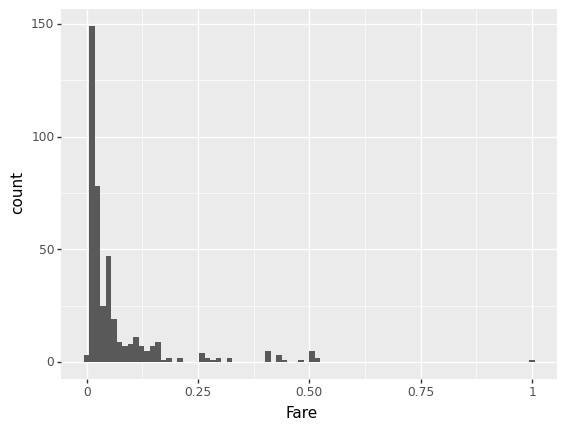

<ggplot: (163354748748)>

In [111]:
(
    ggplot(titanic_teste, aes( x= 'Fare'))+
    geom_histogram()
)

In [112]:
predicoesfinais = tree.predict(titanic_teste)

In [113]:
predicoesfinais

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:
titanic_final = pd.read_csv("data/test.csv")
#titanic_final = titanic_final['PassengerId']
titanic_final['Survived'] = predicoesfinais
titanic_final = titanic_final[['PassengerId','Survived']]
titanic_final


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [124]:
titanic_final.to_csv('titanic_final.csv', index = False)